#Experiment 1

**Topic: Implementation of Time and Frequency domain of a signal**

Name: Anurag Singh

Sapid: 500083382

Rollno: R214220205

Date of Practical: 08-08-22

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [ ]:
arr=np.ones((10,10))
print(arr)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 5.2 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=b2686be2cfb8f4800bfbbf10605351e15159b6348985a85f8a2780e759bd4869
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [ ]:
from control import *

In [ ]:
g=tf(2,[2,1,2])
t,y=step_response(g)
print(g)


      2
-------------
2 s^2 + s + 2



Text(0, 0.5, 'y')

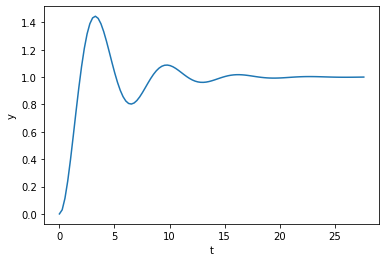

In [ ]:
plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("y")


In [ ]:
from control.matlab import c2d

(array([0.20016013, 0.20016161, 0.20016311, 0.20016462, 0.20016615,
        0.20016769, 0.20016924, 0.20017081, 0.2001724 , 0.20017399,
        0.20017561, 0.20017723, 0.20017888, 0.20018054, 0.20018221,
        0.2001839 , 0.2001856 , 0.20018732, 0.20018906, 0.20019081,
        0.20019258, 0.20019437, 0.20019617, 0.20019799, 0.20019982,
        0.20020168, 0.20020355, 0.20020543, 0.20020734, 0.20020926,
        0.2002112 , 0.20021316, 0.20021514, 0.20021713, 0.20021914,
        0.20022118, 0.20022323, 0.2002253 , 0.20022739, 0.20022949,
        0.20023162, 0.20023377, 0.20023594, 0.20023813, 0.20024033,
        0.20024256, 0.20024481, 0.20024708, 0.20024937, 0.20025169,
        0.20025402, 0.20025638, 0.20025875, 0.20026115, 0.20026358,
        0.20026602, 0.20026849, 0.20027098, 0.20027349, 0.20027603,
        0.20027859, 0.20028117, 0.20028378, 0.20028641, 0.20028907,
        0.20029175, 0.20029446, 0.20029719, 0.20029994, 0.20030273,
        0.20030553, 0.20030837, 0.20031123, 0.20

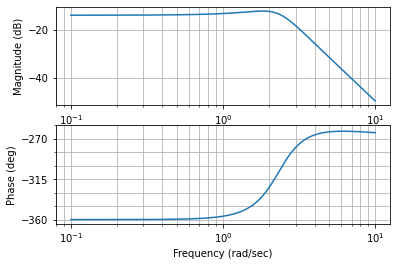

In [ ]:

g=tf(1,[0.3,0.4,0,5])
bode_plot(g)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
m = 1 #mass
L = 1 #length
g = 9.81
theta0 = np.radians(60) #Angular Displacement
v0 = 0 #Tangential Velocity
# Estimating the period using the harmonic (small displacement) approximation.
Tharm = 2 * np.pi * np.sqrt(L / g)
dt = 0.01 # Time step
# Initial Values
theta = [theta0]
v = [v0]
old_theta = theta0
i = 0
while True:
 i += 1
 t = i * dt
 
 old_theta, old_v = theta[-1], v[-1]
 omega = old_v / L
 new_theta = old_theta - omega * dt
 acc = g * np.sin(old_theta) # Tangential acceleration.
 new_v = old_v + acc * dt # updating the tangential velocity.
 if t > Tharm and new_v * old_v < 0:
 # At the second turning point(extreme) we reach initial position so, we hav
e completed one period and the simulation ends.
 break
 theta.append(new_theta)
 v.append(new_v)
nsteps = len(theta)
T = nsteps * dt
print('Calculated period, T = {} s'.format(T))
print('Estimated small-displacement angle period, Tharm = {} s'.format(Tharm))
k = np.sin(theta0/2)
print('SciPy calculated period, T = {} s'.format(2 * Tharm / np.pi * ellipk(k**2)))
def get_coords(th):
 return L * np.sin(th), -L * np.cos(th)
#Animating
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
x0, y0 = get_coords(theta0)
line, = ax.plot([0, x0], [0, y0], lw=3, c='k')
bob_radius = 0.08
circle = ax.add_patch(plt.Circle(get_coords(theta0), bob_radius,
 fc='r', zorder=3))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, L*1.2)
def animate(i):
 x, y = get_coords(theta[i])
 line.set_data([0, x], [0, y])
 circle.set_center((x, y))
ani = animation.FuncAnimation(fig, animate, frames=nsteps, repeat=True,
 interval=dt*1000)

IndentationError: ignored